In [201]:
import pandas  as pd
import seaborn as sns
from scipy.stats import ranksums


In [202]:
# reading file
df = pd.read_csv('tips_atualizado.csv')

# modifing columns
days = {
    'Sun'  : 'Sunday',
    'Sat'  : 'Saturday',
    'Thur' : 'Thursday',
    'Fri'  : 'Friday'
}
df.day = df.day.map(days)

# preview of data frame
df.head(10)
# size of data frame
df.shape[0]
# count if there are NA values
df.count()
# summary of data frame
df.describe()

,total_bill,tip,size
count,3416.000000,3416.000000,3416.000000
mean,19.824368,2.711189,2.569672
std,8.984716,1.078789,0.949288
min,2.799644,0.766203,1.000000
25%,13.388590,1.919737,2.000000
50%,17.800015,2.549192,2.000000
75%,24.331401,3.292833,3.000000
max,55.804318,10.000000,6.000000


# Analysis 1 - Bill value and tips

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

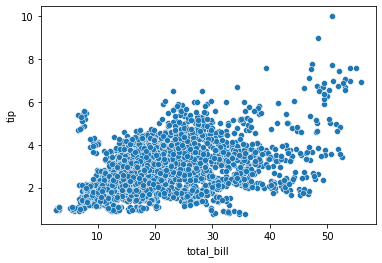

In [203]:
sns.scatterplot(x='total_bill', y='tip', data=df)


<AxesSubplot:xlabel='total_bill', ylabel='percent'>

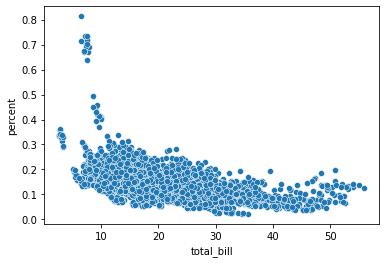

In [204]:
# create new column for % of the tip
df["percent"] = df["tip"] / df["total_bill"]

sns.scatterplot(x='total_bill', y="percent", data=df)

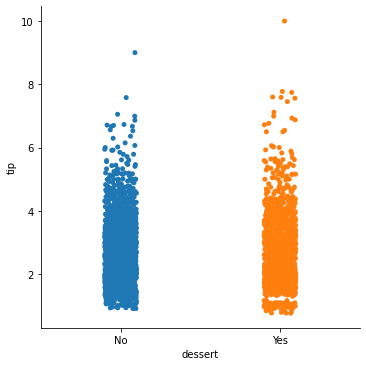

In [205]:
df[df.dessert=='Yes'].describe()
df[df.dessert=='No'].describe()

# category tips by Dessert = Yes or No
sns.catplot(data=df, x="dessert", y="tip")

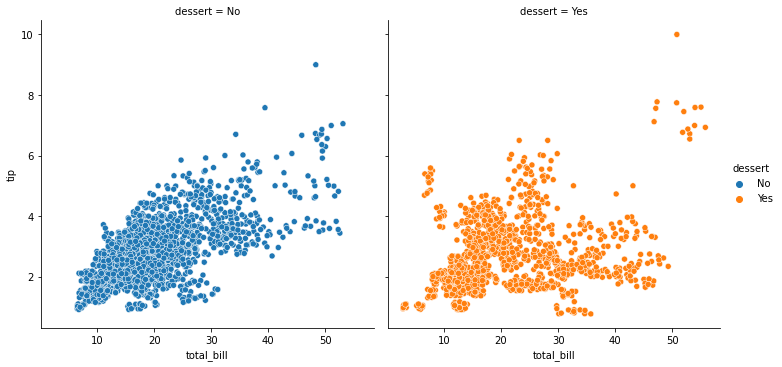

In [206]:
sns.relplot(x='total_bill', y='tip', hue='dessert', col='dessert', data=df)

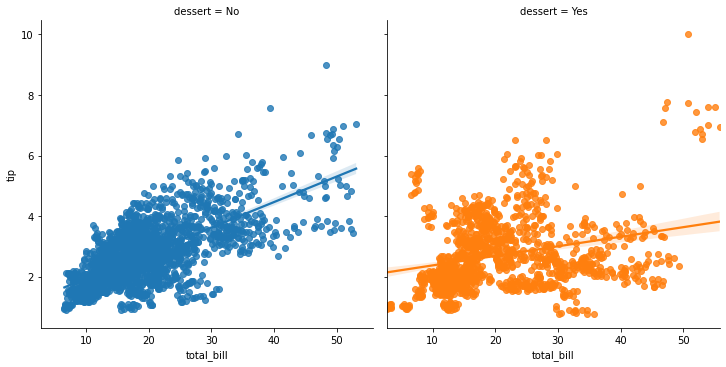

In [207]:
sns.lmplot(x='total_bill', y='tip', hue='dessert', col='dessert',data=df)

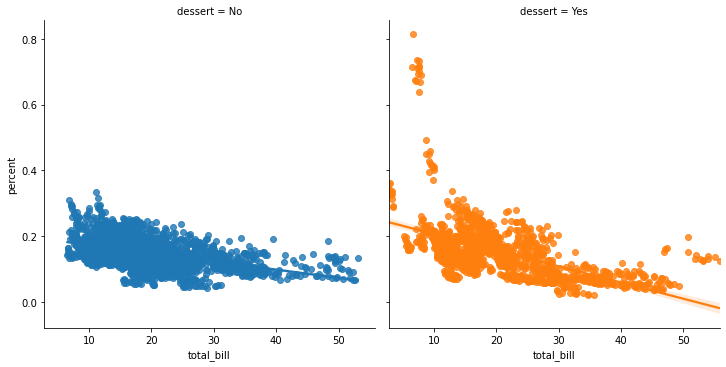

In [208]:
sns.lmplot(x='total_bill', y='percent', hue='dessert', col='dessert',data=df)

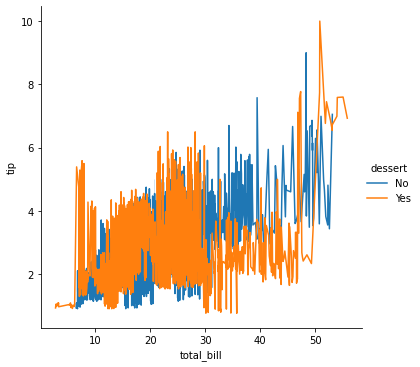

In [209]:
sns.relplot(x='total_bill', y='tip', hue='dessert', kind='line', data=df)

## Hypothesis Test

**H<sup>null</sup>**
> Tip distribuition is the same netween the two groups

**H<sup>alt</sup>**
>Tip distribuition is not the same netween the two groups

In [210]:
dessert_yes = df.query("dessert == 'Yes'").percent
dessert_no = df.query("dessert == 'No'").percent

In [211]:
r = ranksums(dessert_yes, dessert_no)

print('P.value = {}'.format(r.pvalue))

P.value = 0.036051425250648333


In [212]:
# Analysing week days
df.day.unique()

array(['Sunday', 'Saturday', 'Thursday', 'Friday'], dtype=object)

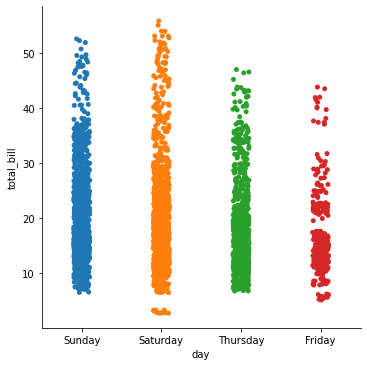

In [213]:
sns.catplot(x='day', y='total_bill', data=df)

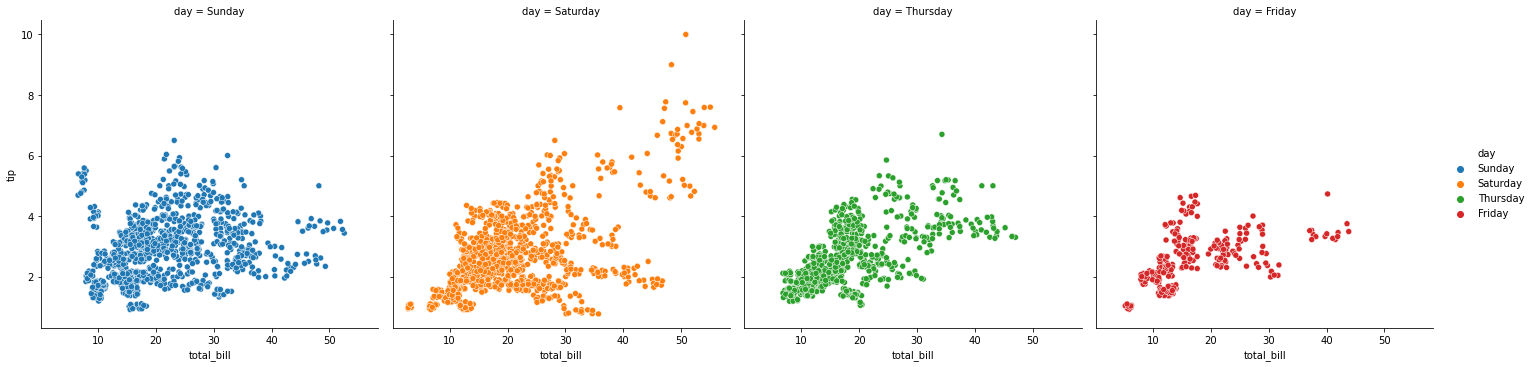

In [214]:
sns.relplot(x='total_bill', y='tip', hue="day", col='day', data=df)

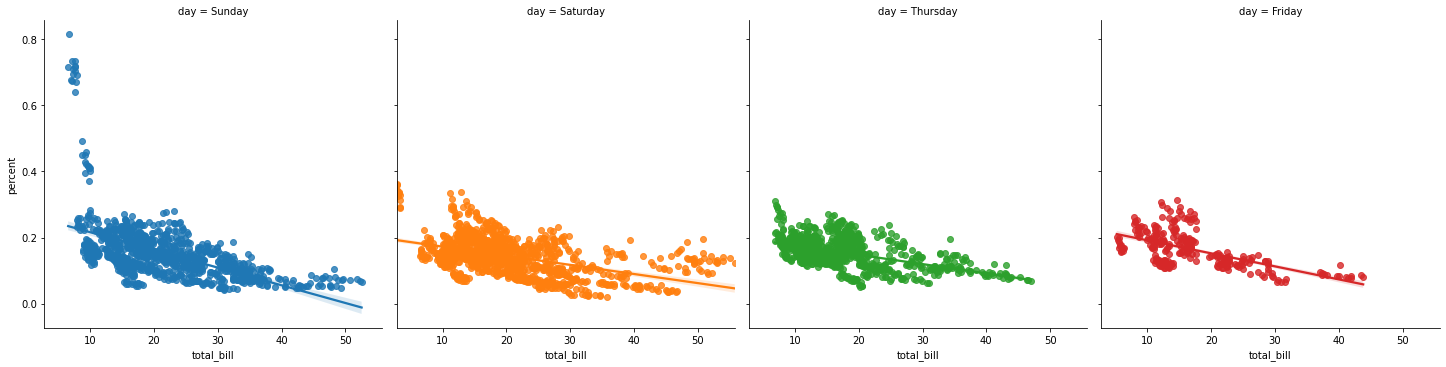

In [215]:
sns.lmplot(x='total_bill', y='percent', hue="day", col='day', data=df)

In [216]:
# data mean grouped by day
df.groupby(['day']).mean()
df.groupby(['day']).mean().drop(columns='size')


,total_bill,tip,percent
day,,,
Friday,17.215616,2.549960,0.163171
Saturday,20.480249,2.690114,0.143576
Sunday,21.439133,2.902079,0.154985
Thursday,17.724088,2.556177,0.154215


In [217]:
# frequency of days
df.day.value_counts()

Saturday    1218
Sunday      1064
Thursday     868
Friday       266
Name: day, dtype: int64

In [218]:
print("Saturday tip mean = {}".format(df.groupby(['day']).mean()['tip']['Saturday'].round(2)),
      ", frequency = {}".format(df.day.value_counts()['Saturday']) )

print("Sunday tip mean = {}".format(df.groupby(['day']).mean()['tip']['Sunday'].round(2)),
      ", frequency = {}".format(df.day.value_counts()['Sunday']) )

Saturday tip mean = 2.69 , frequency = 1218
Sunday tip mean = 2.9 , frequency = 1064


### Hypothesis Test 2

Does the frequency of days determine the tips mean?

**H<sup>null</sup>**  
Total bill distribuition is the same in Saturday and Sunday  
**H<sup>alt</sup>**  
Total bill distribuition is not the same in Saturday and Sunday

In [219]:
# get saturday and sunday bill values

saturday_bill = df.query("day == 'Saturday'").total_bill
sunday_bill = df.query("day == 'Sunday'").total_bill

# hypothesis test
r2 = ranksums(saturday_bill, sunday_bill)[1]
print("Pvalue = {}".format(r2))
if (r2 > 0.05):
    print("Null hypothesis accepted.")
else:
    print("Null hypothesis rejected.")

Pvalue = 0.0004435935681441821
Null hypothesis rejected.


C:\Users\joaob\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 60.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\joaob\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


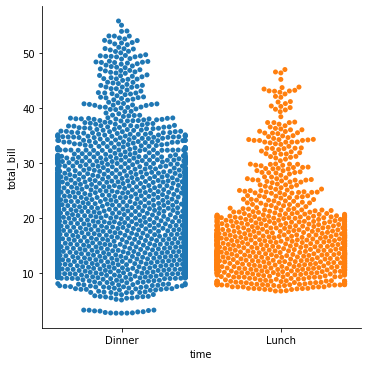

In [220]:
# Analysing Time of the day vs Total Bill

sns.catplot(x='time', y='total_bill', kind='swarm',data=df)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

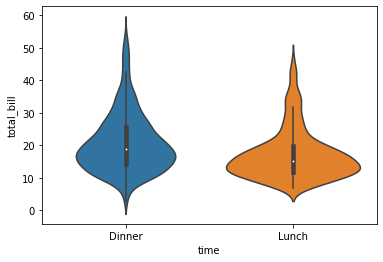

In [221]:
sns.violinplot(x='time', y='total_bill', data=df)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

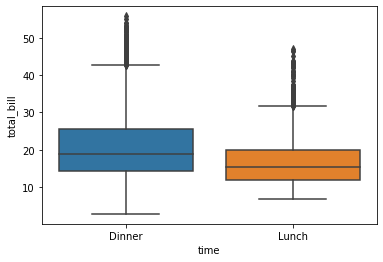

In [222]:
sns.boxplot(x='time', y='total_bill', data=df)

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

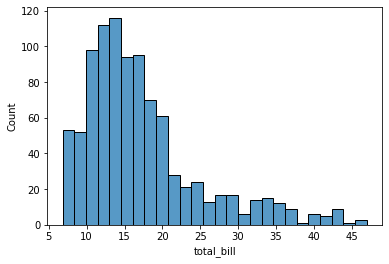

In [223]:
dinner = df.query("time=='Dinner'").total_bill
lunch = df.query("time=='Lunch'").total_bill

sns.histplot(lunch)

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

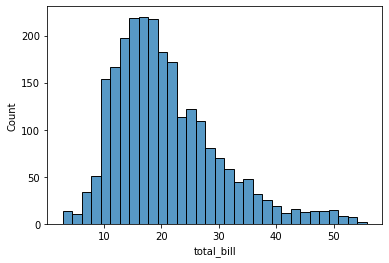

In [227]:
sns.histplot(dinner)

In [224]:
df.groupby(['time']).mean().drop(columns='size')

,total_bill,tip,percent
time,,,
Dinner,20.832954,2.779458,0.148876
Lunch,17.213913,2.534495,0.157784


### Hypothesis Test 3

Total bill value distribuition is the same between lunch and dinner?

**H<sup>null</sup>**  
Total bill distribuition is the same in Lunch and Dinner  
**H<sup>alt</sup>**  
Total bill distribuition is not the same in Lunch and Dinner  

In [225]:
# hypothesis test
r3 = ranksums(lunch, dinner)[1]
print("Pvalue = {}".format(r3))
if (r3 > 0.05):
    print("Null hypothesis accepted.")
else:
    print("Null hypothesis rejected.")

Pvalue = 5.169201062207143e-34
Null hypothesis rejected.


In [226]:
dinner_percent = df.query("time=='Dinner'").percent
lunch_percent = df.query("time=='Lunch'").percent

# hypothesis test
r4 = ranksums(lunch_percent, dinner_percent)[1]
print("Pvalue = {}".format(r4))
if (r4 > 0.05):
    print("Null hypothesis accepted.")
else:
    print("Null hypothesis rejected.")

Pvalue = 9.480580720296862e-12
Null hypothesis rejected.


In [229]:
10 % 2 + 3 // 10

0